## **UFF - Minicurso: Introdução às Redes Neurais Artificiais**
### Niterói, 19 e 20 de Outubro - 9h às 13h
### Por Ygor Moreira Lima


## Aquisição dos Pacotes TensorFlow e Keras
Por default, o Google Colab já possui as libs acima. No entanto, é interessante que o procedimento seja feito, caso o notebook seja executado em outro ambiente.

In [7]:
!pip install tensorflow
!pip install keras

In [8]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.13.0


## Low Level API - Conceitos
Guia do TensorFlow: https://www.tensorflow.org/guide


### Trabalhando com **Constantes**

In [9]:
valor1 = tf.constant(4)
valor2 = tf.constant(2)

type(valor1)

tensorflow.python.framework.ops.EagerTensor

In [10]:
print(valor1) # shape=() --> é um escalar

tf.Tensor(4, shape=(), dtype=int32)


In [11]:
soma = valor1 + valor2
type(soma)

tensorflow.python.framework.ops.EagerTensor

In [12]:
print(soma)

tf.Tensor(6, shape=(), dtype=int32)


In [13]:
texto1 = tf.constant('UFF')
texto2 = tf.constant(' - Introdução às Redes Neurais Artificiais')

type(texto1)

tensorflow.python.framework.ops.EagerTensor

In [14]:
print(texto1)

tf.Tensor(b'UFF', shape=(), dtype=string)


In [15]:
print(texto2)

tf.Tensor(b' - Introdu\xc3\xa7\xc3\xa3o \xc3\xa0s Redes Neurais Artificiais', shape=(), dtype=string)


In [16]:
texto = texto1 + texto2

In [17]:
print(texto)

tf.Tensor(b'UFF - Introdu\xc3\xa7\xc3\xa3o \xc3\xa0s Redes Neurais Artificiais', shape=(), dtype=string)


### Trabalhando com **Variáveis**

In [18]:
soma = tf.Variable([4.0, 5.0], name='soma')
print(soma)
soma.assign([5.0, 6.0])
print(soma)
soma.assign(soma+20)
print(soma)

<tf.Variable 'soma:0' shape=(2,) dtype=float32, numpy=array([4., 5.], dtype=float32)>
<tf.Variable 'soma:0' shape=(2,) dtype=float32, numpy=array([5., 6.], dtype=float32)>
<tf.Variable 'soma:0' shape=(2,) dtype=float32, numpy=array([25., 26.], dtype=float32)>


In [19]:
type(soma)

tensorflow.python.ops.resource_variable_ops.ResourceVariable

### Trabalhando com **Matrizes**

In [20]:
matriz_a = tf.constant([1, 1, 0], name='matriz_a')
matriz_b = tf.constant([2, 0, 4], name='matriz_b')
soma_matriz = matriz_a + matriz_b
print(soma_matriz)

tf.Tensor([3 1 4], shape=(3,), dtype=int32)


In [21]:
matriz_c = tf.constant([[1, 2, 3], [4, 5, 6], [7, 8, 9]], name='matriz_c')
matriz_d = tf.constant([2, 60, 4], name='matriz_d')
print(matriz_c)

tf.Tensor(
[[1 2 3]
 [4 5 6]
 [7 8 9]], shape=(3, 3), dtype=int32)


In [22]:
soma_matriz_z = tf.add(matriz_b, matriz_d)
print(soma_matriz_z)

tf.Tensor([ 4 60  8], shape=(3,), dtype=int32)


### Trabalhando com **Multiplicação de Matrizes**

In [23]:
matriz_a = tf.constant([1, 1, 0], name='matriz_a')
matriz_b = tf.constant([2, 0, 4], name='matriz_b')
matriz_d = tf.constant([2, 60, 4], name='matriz_d')
matriz_p = matriz_a * matriz_b
matriz_j = matriz_a * matriz_d
print(matriz_p)
print(matriz_j)

tf.Tensor([2 0 0], shape=(3,), dtype=int32)
tf.Tensor([ 2 60  0], shape=(3,), dtype=int32)


### Trabalhando com **Produto Escalar**
Exemplo de caso em que é necessário a utilização do Produto Escalar:

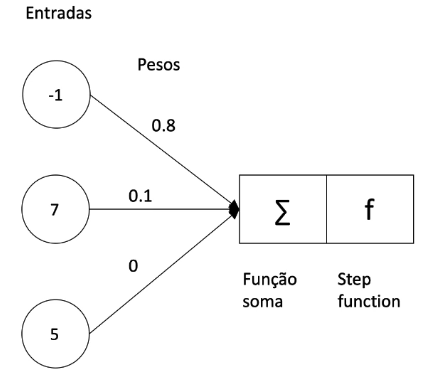

In [24]:
entradas = tf.constant([1, 7.0, 5], name='entradas')
pesos = tf.constant([0.8, 0.1, 0.0], name='pesos')
print(entradas)
print(pesos)

tf.Tensor([1. 7. 5.], shape=(3,), dtype=float32)
tf.Tensor([0.8 0.1 0. ], shape=(3,), dtype=float32)


In [25]:
produto_escalar = tf.tensordot(entradas, pesos, 1)
print(produto_escalar)

tf.Tensor(1.5, shape=(), dtype=float32)


### Trabalhando com **Grafos e TensorBoard**
O TensorBoard é um conjunto de ferramentas de visualização para depuração, otimização e compreensão do TensorFlow, PyTorch, Hugging Face Transformers e outros programas de aprendizado de máquina.

In [26]:
a = tf.add(2,2, name='add')
b = tf.multiply(a, 5, name='mult1')
c = tf.multiply(b, a, name='mult2')

In [27]:
# Fonte desta solução: https://stackoverflow.com/questions/58843269/display-graph-using-tensorflow-v2-0-in-tensorboard

import tensorflow as tf
from tensorflow.python.ops import summary_ops_v2

# Some function to convert into a graph
@tf.function
def my_fun(x):
    return 2 * x

# Test
#a = tf.constant(10, tf.float32)
#b = my_fun(a)
#tf.print(b)
# 20

# Log the function graph
log_dir = 'teste-graph-view'
writer = tf.summary.create_file_writer(log_dir)
with writer.as_default():
    # Get concrete graph for some given inputs
    func_graph = my_fun.get_concrete_function(c).graph
    # Write the graph
    summary_ops_v2.graph(func_graph.as_graph_def())
writer.close()

## Low Level API - Criação de RNA para solução do XOR

In [28]:
import numpy as np
import seaborn as sns

In [29]:
X = np.array([[0,0], [0,1], [1,0], [1,1]])
print(X)

[[0 0]
 [0 1]
 [1 0]
 [1 1]]


In [30]:
y = np.array([[0], [1], [1], [0]])
print(y)

[[0]
 [1]
 [1]
 [0]]


In [31]:
X = tf.convert_to_tensor(X, dtype = tf.float32, name = 'X')
y = tf.convert_to_tensor(y, dtype = tf.float32, name = 'y')

In [32]:
neuronios_entrada = 2
neuronios_oculta = 3
neuronios_saida = 1

In [33]:
# Nosso dicionário 'W' contém as informações de peso da camada oculta e da camada de saída
# Lembrando: Pela arquitetura que definimos previamente, são 6 pesos na camada oculta e 3 pesos na camada de saída.
# Os valores são inicializados aleatoriamente, conforme uma distribuição normal
# Camada oculta: São dispostos em uma matriz 2X3
# Camada saída: São dispostos em uma matriz 1X3

W = {'oculta': tf.Variable(tf.random.normal([neuronios_entrada, neuronios_oculta]), name = 'w_oculta'),
     'saida': tf.Variable(tf.random.normal([neuronios_oculta, neuronios_saida]), name = 'w_saida')}

In [34]:
print(W['oculta'])

<tf.Variable 'w_oculta:0' shape=(2, 3) dtype=float32, numpy=
array([[ 0.2830241 , -0.06998097,  0.07044429],
       [ 0.02914419, -1.1185158 ,  1.1180975 ]], dtype=float32)>


In [35]:
print(W['saida'])

<tf.Variable 'w_saida:0' shape=(3, 1) dtype=float32, numpy=
array([[-1.3239827 ],
       [-0.50333774],
       [ 0.30791482]], dtype=float32)>


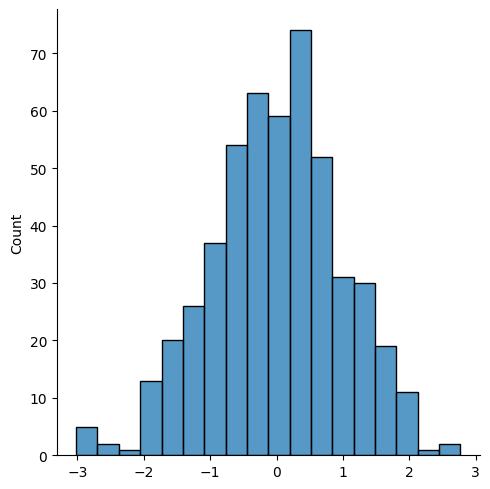

In [36]:
distribuicao = np.random.normal(size = 500)
sns.displot(distribuicao)

In [37]:
print(f"Tamanho do vetor distribuicao: {len(distribuicao)}")
print(distribuicao)

Tamanho do vetor distribuicao: 500
[ 1.07010563e-02  4.28479658e-01 -1.79271861e+00 -8.02235146e-01
  1.47557376e-02 -2.40031709e-01  5.05213444e-01  6.94640868e-01
 -4.07140684e-04 -5.43307528e-01  2.12493349e+00  5.43564294e-01
  1.12344630e+00  1.21161331e-01  1.37917396e+00 -9.43667296e-01
 -1.81477407e+00  1.45297058e-01 -8.86237984e-01 -3.34572539e-01
 -2.21994590e-01 -4.16710175e-01  7.10802634e-01  3.66750444e-01
 -9.11666510e-01 -5.81575987e-01  3.08335089e-01 -1.43871041e+00
  1.26900626e+00 -1.36668595e+00 -1.45124206e-01 -9.57423168e-01
 -3.43434766e-01  6.98431845e-01 -6.40398601e-02  5.47265720e-01
  3.77164979e-01  8.34224542e-01 -6.85774326e-01 -2.28079887e-01
 -3.91484393e-01 -1.02661381e+00  8.68546749e-01  1.39049661e-01
  2.11816021e+00 -8.10297760e-01 -2.54863910e+00 -1.03626390e-01
 -3.46256545e-01  2.06772956e+00  4.77680172e-02 -2.42017536e+00
 -2.72297747e+00 -3.72840768e-01  4.24418045e-01 -3.54923248e-01
  9.64753833e-01 -9.61105011e-01 -1.82994674e+00  4.372

In [38]:
b = {'oculta': tf.Variable(tf.random.normal([neuronios_oculta]), name = 'b_oculta'),
     'saida': tf.Variable(tf.random.normal([neuronios_saida]), name = 'b_saida')}

In [39]:
b

{'oculta': <tf.Variable 'b_oculta:0' shape=(3,) dtype=float32, numpy=array([-0.12997146,  0.00534366,  0.06896961], dtype=float32)>,
 'saida': <tf.Variable 'b_saida:0' shape=(1,) dtype=float32, numpy=array([-2.076648], dtype=float32)>}

In [41]:
n_epocas = 2000
taxaAprendizagem = 0.3

otimizador = tf.keras.optimizers.SGD(learning_rate = taxaAprendizagem)
for epoca in range(n_epocas):

    # Todas as operações que fazem parte do grafo (forward pass até o cálculo do erro) devem
    # ser feitas dentro da invocação de `tf.GradientTape()`, para que os gradientes sejam gravados.
    with tf.GradientTape() as tape:
        camada_oculta = tf.add(tf.matmul(X, W['oculta']), b['oculta'])
        camada_oculta_ativacao = tf.sigmoid(camada_oculta)
        camada_saida = tf.add(tf.matmul(camada_oculta_ativacao, W['saida']), b['saida'])
        camada_saida_ativacao = tf.sigmoid(camada_saida)
        erro = tf.keras.losses.MSE(y, camada_saida_ativacao)

    # Vou salvar as variáveis (pesos e biases que são atualizados) em uma variável para facilitar
    # chamá-las depois
    var_list = [W['oculta'], W['saida'], b['oculta'], b['saida']]

    # Cálculo dos gradientes
    gradientes = tape.gradient(erro, var_list)

    # Atualização das variáveis (backpropagation)
    otimizador.apply_gradients(zip(gradientes, var_list))

    if epoca % 200 == 0:
        erro_medio = tf.reduce_mean(erro).numpy()
        print(erro_medio)

0.0005232934
0.0004989923
0.0004767991
0.00045645112
0.00043773276
0.00042045795
0.00040446536
0.00038961906
0.00037580257
0.00036291307


In [42]:
W

{'oculta': <tf.Variable 'w_oculta:0' shape=(2, 3) dtype=float32, numpy=
 array([[ 4.656986 ,  0.7835635,  6.300158 ],
        [ 4.317556 , -2.2246857,  6.536928 ]], dtype=float32)>,
 'saida': <tf.Variable 'w_saida:0' shape=(3, 1) dtype=float32, numpy=
 array([[-9.979046],
        [ 0.975627],
        [ 9.575927]], dtype=float32)>}

In [43]:
b

{'oculta': <tf.Variable 'b_oculta:0' shape=(3,) dtype=float32, numpy=array([-6.868025  , -0.67001855, -2.8219464 ], dtype=float32)>,
 'saida': <tf.Variable 'b_saida:0' shape=(1,) dtype=float32, numpy=array([-4.739311], dtype=float32)>}

In [44]:
# Teste
camada_oculta_teste = tf.add(tf.matmul(X, W['oculta']), b['oculta'])
camada_oculta_ativacao_teste = tf.sigmoid(camada_oculta_teste)
camada_saida_teste = tf.add(tf.matmul(camada_oculta_ativacao_teste, W['saida']), b['saida'])
camada_saida_ativacao_teste = tf.sigmoid(camada_saida_teste)

In [45]:
camada_saida_ativacao_teste

<tf.Tensor: shape=(4, 1), dtype=float32, numpy=
array([[0.02019822],
       [0.98087853],
       [0.983371  ],
       [0.01879674]], dtype=float32)>

## High Level API - Criação de RNA para solução do XOR com Keras

In [53]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

taxaAprendizagem = 0.3
n_epocas = 5000

# Dados de entrada e saída para o problema XOR
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0])

# Links úteis
# TF e Keras CheatSheet: https://github.com/ryanxjhan/TensorFlow-2.x-Cheat-Sheet
# https://towardsdatascience.com/tensorflow-keras-cheat-sheet-5ec99d9a1ccf
# https://www.tensorflow.org/guide/keras/sequential_model
# https://keras.io/guides/

# Criação do modelo da rede neural
model = keras.Sequential([
    layers.Input(shape=(2,)),
    layers.Dense(3, activation='sigmoid'),
    layers.Dense(1, activation='sigmoid')
])

# Compilação do modelo com SGD e learning rate de 0.3
optimizer = keras.optimizers.SGD(learning_rate=taxaAprendizagem)

# Guia do Keras sobre Loss: https://keras.io/api/losses/
#model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
model.compile(optimizer=optimizer, loss=tf.keras.losses.MeanSquaredError(), metrics=['accuracy'])

# Treinamento da rede neural
model.fit(X, y, epochs=n_epocas, verbose=0)

# Avaliação do modelo
loss, accuracy = model.evaluate(X, y)
print(f"Acurácia do modelo: {accuracy * 100:.2f}%")

# Previsão
predictions = model.predict(X)
for i in range(len(X)):
    print(f"Entrada: {X[i]}, Previsão: {predictions[i][0]:.2f}")

1/1 [==============================] - 0s 208ms/step - loss: 0.0083 - accuracy: 1.0000


Acurácia do modelo: 100.00%
1/1 [==============================] - 0s 82ms/step
Entrada: [0 0], Previsão: 0.09
Entrada: [0 1], Previsão: 0.91
Entrada: [1 0], Previsão: 0.90
Entrada: [1 1], Previsão: 0.08


## Transferência de Aprendizagem
A transferência de aprendizado (ou transferência de conhecimento) com o Keras envolve o uso de modelos de rede neural pré-treinados em tarefas específicas e ajustá-los para atender a uma nova tarefa relacionada. Isso é útil quando você tem um conjunto de dados pequeno para a nova tarefa, mas pode se beneficiar do conhecimento aprendido pelo modelo pré-treinado. O Keras torna isso relativamente simples, graças à disponibilidade de modelos pré-treinados e sua flexibilidade.

In [50]:
model.save_weights('meus_pesos.h5')

In [51]:
X_avaliar = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])

model_treinado = keras.Sequential([
    layers.Input(shape=(2,)),
    layers.Dense(3, activation='sigmoid'),
    layers.Dense(1, activation='sigmoid')
])

model_treinado.load_weights('meus_pesos.h5')

predictions = model_treinado.predict(X)
for i in range(len(X)):
    print(f"Entrada: {X[i]}, Previsão: {predictions[i][0]:.2f}")

1/1 [==============================] - 0s 58ms/step
Entrada: [0 0], Previsão: 0.02
Entrada: [0 1], Previsão: 0.98
Entrada: [1 0], Previsão: 0.97
Entrada: [1 1], Previsão: 0.03
